Data Source - [Netflix Data](https://www.kaggle.com/datasets/shivamb/netflix-shows)

The purpose of this analysis is to find the following:
1. Data Cleaning & Prep
- Handle missing values (e.g., director, cast, country).
- Convert date_added from string to datetime format.
- Extract useful features (e.g., month/year added, duration in minutes).

2. Exploratory Data Analysis (EDA)
- Content Distribution: Movies vs. TV shows over time.
- Release Trends: When were most shows/movies added to Netflix?
- Country Analysis: Which countries produce the most content?
- Ratings Analysis: What’s the most common rating (TV-MA, PG-13, etc.)?

3. Visualizations (Use Matplotlib/Seaborn or Plotly)
- 📈 Bar Chart: Number of Movies vs. TV Shows by year.
- 🌍 Map Visualization: Countries producing the most content (using geopandas or Plotly).
- 📅 Time Series Plot: Monthly additions of content over the years.
- 📊 Pie Chart: Distribution of ratings (TV-MA, PG-13, etc.).

4. More Challenge
- Recommendation System (Basic): Suggest similar content based on genre.

In [51]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Happy Coding 😊')

Happy Coding 😊


In [52]:
data = pd.read_csv('./netflix_titles.csv') # importing the dataset

### Data Cleaning

In [53]:
data.head() # Displaying the first 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
data.sample(15) # Displaying 15 random rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6905,s6906,Movie,Hükümet Kadin 2,Sermiyan Midyat,"Demet Akbağ, Sermiyan Midyat, Mahir İpek, Gülh...",Turkey,"March 10, 2017",2013,TV-14,101 min,"Comedies, International Movies","In 1949, with freedoms threatened, housewife H..."
5448,s5449,Movie,Amelia: A Tale of Two Sisters,Edward Cotterill,Rachael Stirling,United Kingdom,"June 1, 2017",2017,TV-PG,44 min,Documentaries,"Eight decades after her disappearance, Amelia ..."
2679,s2680,Movie,Maurício Meirelles: Generating Chaos,Diego Pignataro,Maurício Meirelles,Brazil,"April 16, 2020",2020,TV-MA,63 min,Stand-Up Comedy,Comedian Maurício Meirelles explores his chaot...
7819,s7820,Movie,Radiopetti,Hari Viswanath,"Lakshmanan, TVV Ramanujam, Shobana, Nivas Adit...",India,"January 1, 2017",2015,TV-PG,83 min,"Dramas, International Movies","An elderly, hearing-impaired Indian man stays ..."
3135,s3136,Movie,Fukrey,Mrighdeep Singh Lamba,"Pulkit Samrat, Manjot Singh, Ali Fazal, Varun ...",India,"December 15, 2019",2013,TV-14,135 min,"Action & Adventure, Comedies, Dramas",Four young male friends tackle the challenges ...
6307,s6308,Movie,Big Time,Kaspar Astrup Schröder,Bjarke Ingels,Denmark,"April 1, 2018",2017,TV-MA,90 min,Documentaries,"In this documentary, architect Bjarke Ingels o..."
7384,s7385,Movie,Mahjong Heroes,Li Pei-Chuan,"Patrick Tse, Betty Ting Pei, Hua Yueh, Chin Si...",Hong Kong,"August 16, 2018",1981,TV-PG,92 min,"Comedies, International Movies","In this comedy, characters from all walks of l..."
4669,s4670,Movie,Once Again,Kanwal Sethi,"Shefali Shah, Neeraj Kabi, Rasika Dugal, Bidit...","India, Germany, Austria","September 1, 2018",2018,TV-PG,101 min,"Dramas, Independent Movies, International Movies",After a chance phone call leads to daily conve...
7704,s7705,Movie,Paranormal Activity,Oren Peli,"Katie Featherston, Randy McDowell, Amber Armst...",United States,"January 1, 2020",2007,R,86 min,"Horror Movies, Thrillers",When Katie and Micah fear their home may be ha...
1690,s1691,Movie,Whose Streets?,"Sabaah Folayan, Damon Davis",NaN,United States,"November 16, 2020",2017,R,102 min,Documentaries,"Powered by activists and leaders, this documen..."


In [55]:
data.isnull().sum() # checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [56]:
data[(data['director'].isnull()) & (data['type'] != 'TV Show')] # checking for null values in the director column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
404,s405,Movie,9to5: The Story of a Movement,NaN,NaN,NaN,"July 22, 2021",2021,TV-MA,85 min,Documentaries,"In this documentary, female office workers in ..."
470,s471,Movie,Bridgerton - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"July 13, 2021",2021,TV-14,39 min,Movies,"""Bridgerton"" cast members share behind-the-sce..."
483,s484,Movie,Last Summer,NaN,"Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı, ...",NaN,"July 9, 2021",2021,TV-MA,102 min,"Dramas, International Movies, Romantic Movies","During summer vacation in a beachside town, 16..."
641,s642,Movie,Sisters on Track,NaN,NaN,NaN,"June 24, 2021",2021,PG,97 min,"Documentaries, Sports Movies",Three track star sisters face obstacles in lif...
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8231,s8232,Movie,The Bund,NaN,Chow Yun Fat,Hong Kong,"September 20, 2018",1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies","After losing everything, a young man rebuilds ..."
8268,s8269,Movie,The Darkest Dawn,NaN,NaN,United Kingdom,"June 23, 2018",2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern...",An aspiring filmmaker records the chaos of an ...
8330,s8331,Movie,The Great Battle,NaN,"Zo In-sung, Nam Joo-hyuk, Park Sung-woong, Bae...",South Korea,"April 8, 2019",2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies","In seventh-century Korea, the commander of Ans..."
8647,s8648,Movie,"Twisted Trunk, Big Fat Body",NaN,"Vijay Maurya, Naman Jain, Usha Nadkarni, Mukes...",India,"January 15, 2017",2015,TV-14,89 min,"Dramas, International Movies",After terrorists place a bomb inside a toy Lor...


In [57]:
print(data['type'].unique()) # Displaying unique values in the type column

['Movie' 'TV Show']


In [58]:
data.loc[data['duration'].isnull(), 'rating'] = 'TV-MA' # The rating of the TV shows with missing duration is set to TV-MA

In [59]:
data.loc[data['title'] == 'Louis C.K. 2017', 'duration'] = '74 min' # The duration of the movie is set to 74 min
data.loc[data['title'] == 'Louis C.K.: Hilarious', 'duration'] = '84 min' # The duration of the movie is set to 84 min
data.loc[data['title'] == 'Louis C.K.: Live at the Comedy Store', 'duration'] = '66 min' # The duration of the movie is set to 66 min

In [60]:
data['director'] = data['director'].fillna('Unknown') # filling the null values with 'Unknown'
data['country'] = data['country'].fillna('Unknown') # filling the null values with 'Unknown'
data['cast'] = data['cast'].fillna('Unknown') # filling the null values with 'Unknown'

In [61]:
data['rating'] = data['rating'].fillna('Not Rated') # filling the null values with '

In [62]:
data[data['date_added'].isnull()] # checking for null values in the date_added column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [63]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format="%B %d, %Y", errors='coerce') # converting the date_added column to datetime format

In [64]:
data['date_added'].dtype # checking the data type of the date_added column

dtype('<M8[ns]')

In [65]:
data.isnull().sum() # checking for null values

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [66]:
# data.to_csv('netflix_file.csv', index=False)

## Exploratory Data Analysis (EDA)

##### Movies vs. TV shows over time.

In [67]:
data[['date_added', 'type']] # checking for null values in the date_added column

,date_added,type
0,2021-09-25,Movie
1,2021-09-24,TV Show
2,2021-09-24,TV Show
3,2021-09-24,TV Show
4,2021-09-24,TV Show
...,...,...
8802,2019-11-20,Movie
8803,2019-07-01,TV Show
8804,2019-11-01,Movie
8805,2020-01-11,Movie


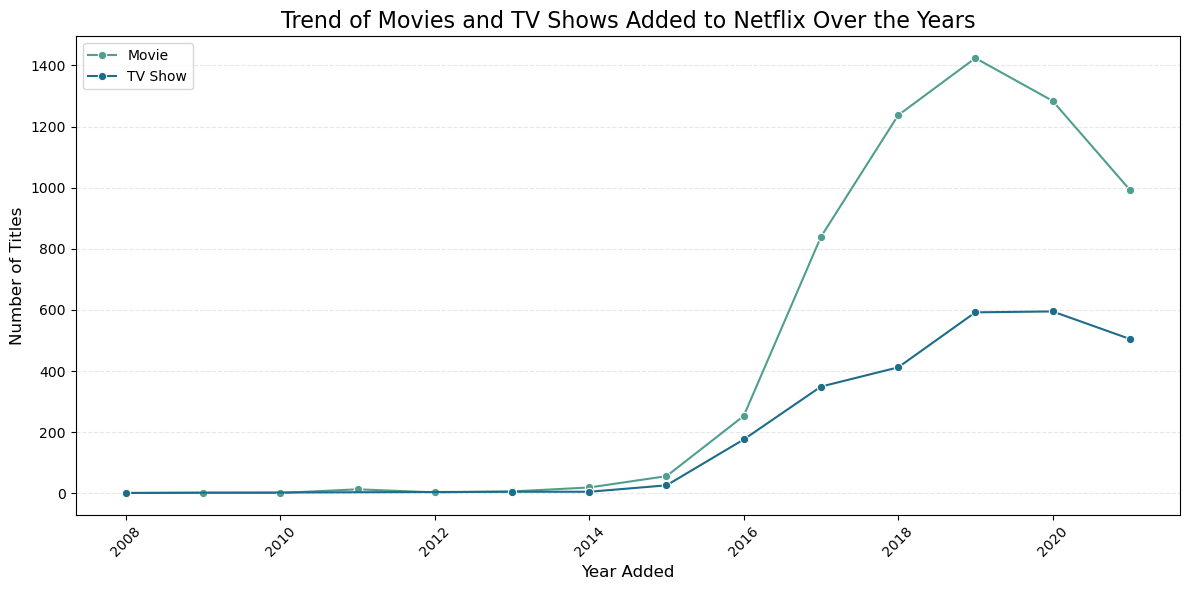

In [68]:
# Extract the year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Group by 'year_added' and 'type' to count the number of entries
content_trend = data.groupby(['year_added', 'type']).size().reset_index(name='count')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type', marker='o', palette='crest')

# Customize the plot
plt.title('Trend of Movies and TV Shows Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

##### When were most shows/movies added to Netflix?

In [69]:
content_trend = data.groupby(['year_added', 'type']).size().reset_index(name='count')

In [70]:
content_trend

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


In [71]:
# Extract the year from 'date_added'
data['year_added'] = data['date_added'].dt.year
# Find the year with the most movies
most_movies_year = data[data['type'] == 'Movie']['year_added'].value_counts().idxmax()

# Find the year with the most TV shows
most_shows_year = data[data['type'] == 'TV Show']['year_added'].value_counts().idxmax()

print(f"The year with the most movies added is: {most_movies_year} with {data[data['type'] == 'Movie']['year_added'].value_counts().max()} movies")
print(f"The year with the most TV shows added is: {most_shows_year} with {data[data['type'] == 'TV Show']['year_added'].value_counts().max()} TV shows")

The year with the most movies added is: 2019.0 with 1424 movies
The year with the most TV shows added is: 2020.0 with 595 TV shows


##### Which countries produce the most content?

In [72]:
data['country'].value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_13244\967481784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_countries, x='count', y='country', palette='crest')


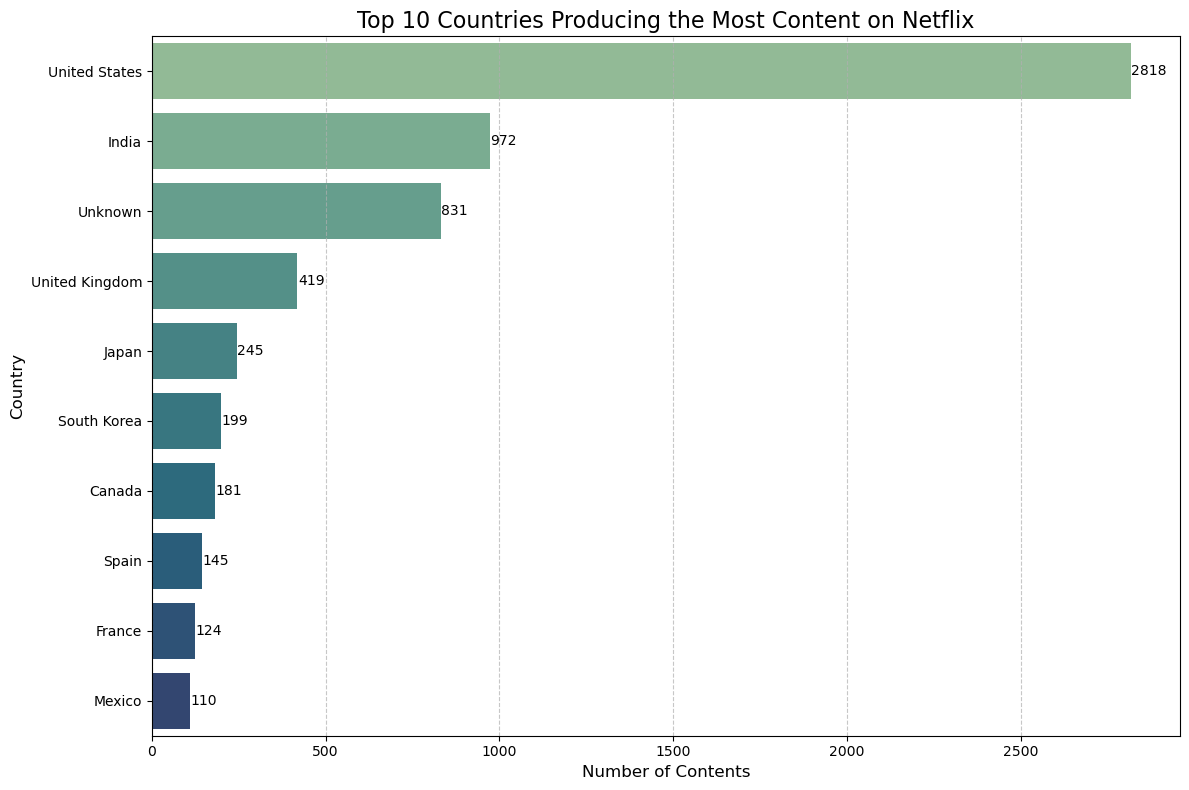

In [73]:
# Get the top 10 countries producing the most content
top_countries = data['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']

# Create a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_countries, x='count', y='country', palette='crest')

# Add data labels to each bar
for index, row in top_countries.iterrows():
    plt.text(row['count'] + 1, index, str(row['count']), va = 'center', fontsize=10)

# Customize the chart
plt.title('Top 10 Countries Producing the Most Content on Netflix', fontsize=16)
plt.xlabel('Number of Contents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

##### What’s the most common rating (TV-MA, PG-13, etc.)

In [74]:
top_ratings = data['rating'].value_counts().reset_index()
top_ratings.columns = ['rating', 'count']
top_ratings

,rating,count
0,TV-MA,3210
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


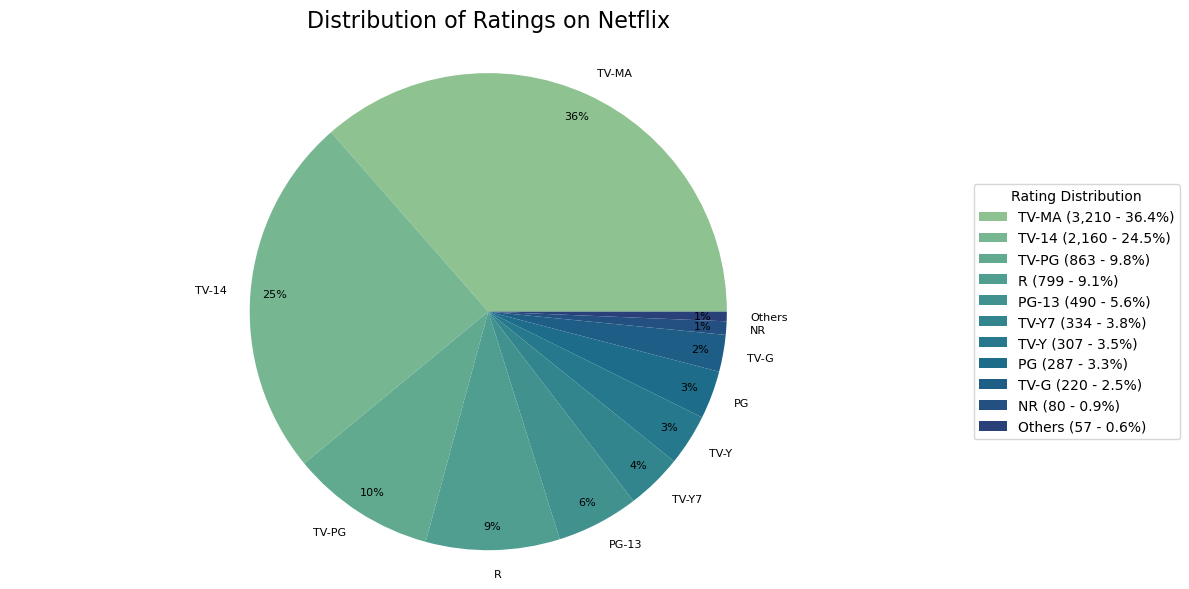

In [75]:
# Get top 10 ratings and calculate 'Others'
top_10_ratings = data['rating'].value_counts().nlargest(10)
others_count = data['rating'].value_counts()[10:].sum()

# Combine top 10 and others into a new Series
ratings_with_others = pd.concat([top_10_ratings, pd.Series({'Others': others_count})])

# Create DataFrame for plotting
plot_data = ratings_with_others.reset_index()
plot_data.columns = ['rating', 'count']

# Create a pie chart with a larger figure size
plt.figure(figsize=(12, 6))

# Calculate percentages
total = plot_data['count'].sum()
percentages = (plot_data['count'] / total * 100).round(1)

# Create simpler labels for the pie slices
labels = plot_data['rating']

# Create pie chart with custom colors and labels
patches, texts, autotexts = plt.pie(plot_data['count'], 
    labels=labels,
    colors=sns.color_palette('crest', n_colors=len(plot_data)),
    autopct='%1.0f%%',
    pctdistance=0.90,
    labeldistance=1.1,
    textprops={'fontsize': 8}
    )

# Add a legend with detailed informationz
legend_labels = [f"{rating} ({count:,} - {pct}%)" 
    for rating, count, pct in zip(plot_data['rating'],plot_data['count'], percentages)]
plt.legend(patches, legend_labels, 
    title="Rating Distribution",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title('Distribution of Ratings on Netflix', fontsize=16, pad=16)

# Ensure the pie is circular
plt.axis('equal')

# Adjust layout to prevent legend cropping
plt.tight_layout()
plt.show()

##### Number of Movies vs. TV Shows by year.

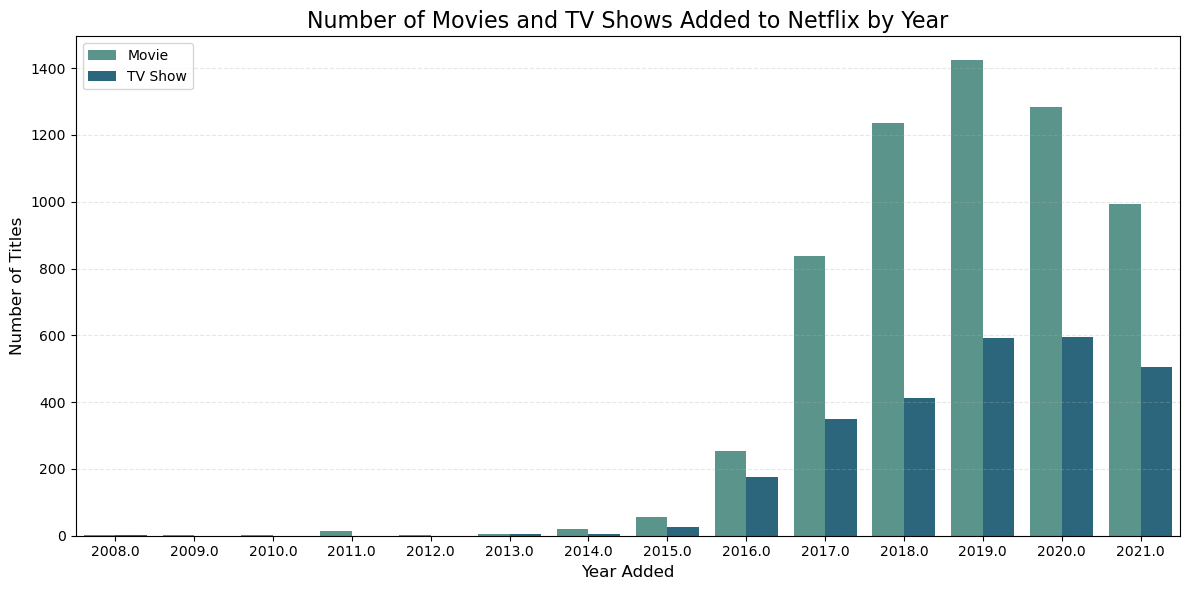

In [76]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.barplot(data=content_trend, x='year_added', y='count', hue='type', palette='crest')

# Customize the plot
plt.title('Number of Movies and TV Shows Added to Netflix by Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
# plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

##### Most popular genres on Netflix

In [77]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


C:\Users\USER\AppData\Local\Temp\ipykernel_13244\3345769403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='crest')


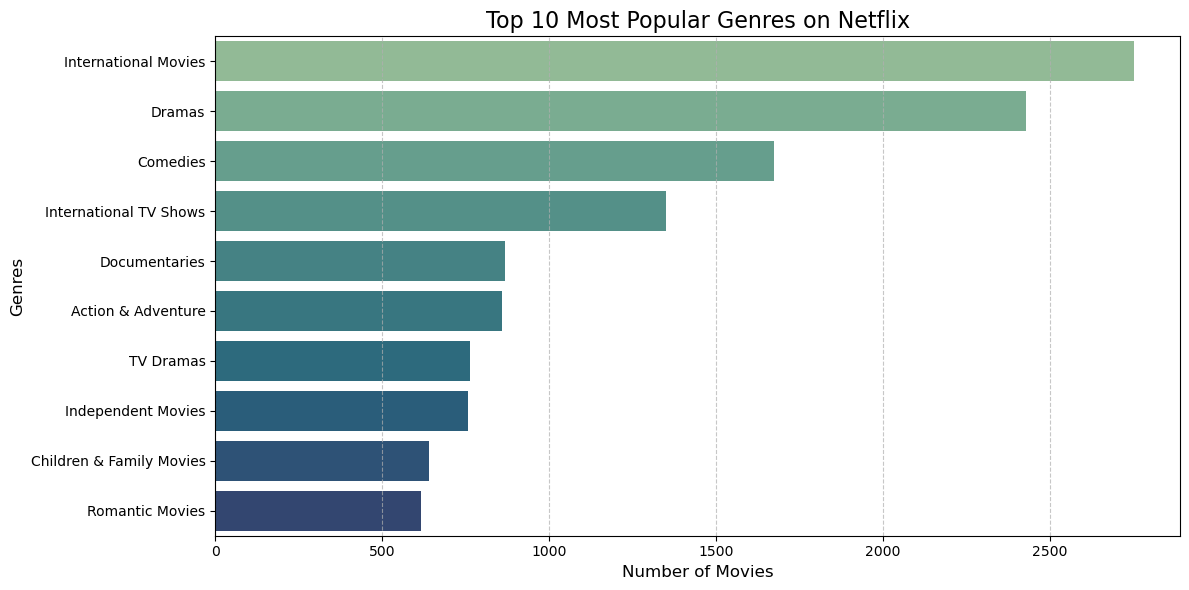

In [78]:
# Split the 'listed_in' column into individual genres and count occurrences
genre_counts = data['listed_in'].str.split(',').explode().str.strip().value_counts()
# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='crest')
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Movie Recommendation System

In [79]:
from fuzzywuzzy import process

In [80]:
# Step 1: Preprocess the data
# Split the 'listed_in' column into individual genres
data['genres'] = data['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else [])

# Flatten the list of genres to get all unique genres
unique_genres = set([genre for genres in data['genres'] for genre in genres])

# Step 2: Function to match user input to closest genre
def match_genre(user_input):
    # Use fuzzy matching to find the closest genre
    matched_genre, score = process.extractOne(user_input, unique_genres)
    return matched_genre if score > 50 else None  # Return None if no good match is found

# Step 3: Recommend movies based on the matched genre
def recommend_movies(user_input, num_recommendations=10):
    # Match the user's input to a genre
    matched_genre = match_genre(user_input)
    if not matched_genre:
        return f"No matching genre found for '{user_input}'. Please try again."

    # Filter movies that belong to the matched genre
    recommended_movies = data[data['genres'].apply(lambda genres: matched_genre in genres)]

    # Return the top recommendations with title, genres, and description
    return recommended_movies[['title', 'listed_in', 'description']].head(num_recommendations)



In [81]:
# Example usage
user_input = input("What type of movie would you like to watch? (e.g., 'Action', 'Drama', 'Comedy'): ")
recommendations = recommend_movies(user_input)

# Display the recommendations
if isinstance(recommendations, str):
    print(recommendations)  # Print the error message if no match is found
else:
    # Use Pandas' Styler to display the DataFrame with better formatting
    styled_recommendations = recommendations.style.set_properties(**{
        'background-color': '#f9f9f9',
        'border': '1px solid black',
        'color': 'black',
        'text-align': 'left'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4CAF90'), ('color', 'white'), ('font-weight', 'bold')]
    }])
    display(styled_recommendations)

No matching genre found for 'john'. Please try again.
